<p align="center">
  <a>
    <img src="./figures/logo-hi-paris-retina.png" alt="Logo" width="280" height="180">
  </a>

  <h3 align="center">Data Science Bootcamp</h3>
</p>

Dependencies with previous Labs
==========

This lab uses datasets from previous Labs:
- a cleaned dataset with all fires observed between 2011 and 2014 in the US `./data/2_clean/fires.csv`
- a cleaned dataset with external data (demographics, temperature and precipitation) `./data/2_clean/external_data.csv`

You can either:
- [preferred option] start over from the work that you produced
- or take pre-processed datasets located in `./data/9_helper_datasets`. In that case:
    - `./data/9_helper_datasets/external_data.csv` should be **copied** (not deleted) to `./data/2_clean/external_data.csv`
    - `./data/9_helper_datasets/fires.csv` should be **copied** (not deleted) to `./data/2_clean/fires.csv`

Feature Engineering
===================


### Why is it important ?
To undertand the objectives of this Lab, we first need to understand what is a machine learning model:

Building a machine learning model can be summarized in finding a link function $f$
 ($Y=f(X) + \epsilon$) which is most often the
result of error minimization : <p style="text-align: center;">$\sum_i E(Y_i,f(X_i))$</p> where
$(X_i,Y_i)$ is a list of pairs (features, target).

Consequently, features $(X_i)$ are key contributors to the success of a model.
The process of creating new features, that will be used to train a model, is called **feature engineering**



### What is Feature Engineering ?

Feature engineering is the process by which knowledge of data is used to construct explanatory variables, features, that can be used to train a predictive model. Engineering and selecting the correct features for a model will not only significantly improve its predictive power, but will also offer the flexibility to use less complex models that are faster to run and more easily understood.

### How is it done ?

#### Feature Engineering from Datetime
The timestamp in itself is not a feature that can be taken into consideration, but we can extract from it numerical features. Ex: day of the week.
```python
# to get the day of week from a datetime column in a DataFrame, you can use:
df["day_of_week"] = df["date"].dt.dayofweek

# to get the day of month from a datetime column in a DataFrame, you can use:
df["day"] = df["date"].dt.day

# to get the month from a datetime column in a DataFrame, you can use:
df["month"] = df["date"].dt.month
```
More documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

#### Feature Engineering from transformations
Feature transformations can include aggregating, or combining transforming attributes to create new features. Useful and relevant features will depend on the problem at hand but averages, sums, log or ratios can better expose trends to a model.

We can also transform a numerical feature into a categorical feature by cutting it into classes. This can be interesting to avoid the impact of outliers or to reduce the variance of the output variable.

##### Examples: 

```python
# sum 2 numerical columns (works similarly for all classical operators)
df['A+B'] = df['A'] + df['B']

# log transformation
df['var_transformed'] = df['var'].apply(np.log)

# polynomial transformation
df['var_transformed'] = df['var']**2
```

#### Focus on aggregations

### Data Encoding
Some algorithms can't work with categorical data directly. This means that categorical data must be converted to a numerical type. One way of doing so is to use One-Hot Encoding. It consists in transforming one column with N categorical data into N columns with 1 and 0. Each categorical value gets one column, and an observation has a 1 in the column if its original categorical value was its column (see example below)

<img src="./figures/onehotencoding.png" alt="Logo" width="400" height="180">

To perform a OneHotEncoding, you can use [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

```python
# list of columns to encode using One-Hot-Encoding
columns_to_encode = ["var1", "var2"]

# encode those columns
encoded_data = pd.get_dummies(df[columns_to_encode], columns=columns_to_encode)

# add encoded columns to the data
df = pd.concat([df, encoded_data], axis=1)
```

##### **Focus on Aggregation**
One objective of this Lab is to provide an output dataset, with the correct format.
This requires to aggregate values. One can find below an example of aggregation, and additional documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html):

In [1]:
# first, we need to import pandas
import pandas as pd

# read file
fires = pd.read_csv("./data/1_raw/fires/fires_days_train.csv", parse_dates=["DISCOVERY_DATE"])
print("initial DataFrame")
display(fires)

# groupby operation
grouped = fires.groupby(
    ["DISCOVERY_DATE"]
).agg({
    "FIRE":[
        ("nb_states_with_fire", "sum"),
        ("percentage_states_impacted", "mean")
    ],
    "STATE":[
        ("total_nb_states", "count")
    ]
})

# keep one level for column names, and reset index
grouped.columns = grouped.columns.droplevel()
grouped = grouped.reset_index()

# display results
print("grouped DataFrame")
display(grouped)

initial DataFrame


,DISCOVERY_DATE,STATE,FIRE
0,2011-01-01,AK,0.0
1,2011-01-01,MN,0.0
2,2011-01-01,MI,0.0
3,2011-01-01,MO,1.0
4,2011-01-01,IL,0.0
...,...,...,...
94947,2015-12-31,PR,NaN
94948,2015-12-31,RI,NaN
94949,2015-12-31,VT,NaN
94950,2015-12-31,MA,NaN


grouped DataFrame


,DISCOVERY_DATE,nb_states_with_fire,percentage_states_impacted,total_nb_states
0,2011-01-01,12.0,0.230769,52
1,2011-01-02,9.0,0.173077,52
2,2011-01-03,12.0,0.230769,52
3,2011-01-04,19.0,0.365385,52
4,2011-01-05,12.0,0.230769,52
...,...,...,...,...
1821,2015-12-27,0.0,NaN,52
1822,2015-12-28,0.0,NaN,52
1823,2015-12-29,0.0,NaN,52
1824,2015-12-30,0.0,NaN,52


<img src="./figures/Groupby.png" alt="Logo" width="500" height="180">

<img src="./figures/input_output_groupby.png" alt="Logo" width="600" height="180">

Objectives of this lab
======

Use feature engineering to add new relevant features for your predictions.

##### **Information:**
- as a reminder, predictions will be based on a given state, at a given day. Ex: will there be a fire on the June 15th, 2015 in Arizona ?
- Consequently, all features should be expressed for a given state, at a given day.
- 2 datasets will be used as a starting point:
    - a cleaned dataset with all fires observed between 2011 and 2014 in the US `./data/2_clean/fires.csv`.
    - a cleaned dataset with external data (demographics, temperature and precipitation) `./data/2_clean/external_data.csv`
- most of the features that you will create will consist in manipulating pandas DataFrames (creating new columns, and aggregating a result for a given state at a given date).

##### Hypothesis for the model

**As an hypothesis** you can use all available external data (temperature, demographics, precipitation) for your predictions. For example, when you will predict if there is a fire in Arizone in June 15th, 2015, you can use the temperature that was observed in June 15th, 2015. This hypothesis reflects the fact we are confident in weather forecasts, and that the final model can be used few weeks before the prediction.

**However** you only have the history of fires until Dec. 2014. As a consequence, and because you will predict fires up until Dec 31st, 2015, you cannot create features that will use data (from this history of fires) 1 year before the prediction date. For example, if you need to predict the appearence of a fire in June 15th, 2015, you cannot use the history of fires after June 16th, 2014. This hypothesis reflects the needed time to centralize data accross all states and federal agencies, that can take up to 1 year.

<p align="center">
  <a>
    <img src="./figures/Feature_engineering.png" alt="Logo" width="600" height="300">
  </a>
</p>

##### **Guidelines for the Lab:**
- create features for the dataset `./data/2_clean/external_data.csv`
    - you can create/use the function `feature_engineering_external_data` to do so. New features can be:
        - **average maximum temperature** for all available cities inside a state, at a given date
        - **average minimum temperature** for all available cities inside a state, at a given date
        - **delta** between min and max temperatures
        - **average precipitation** for all available cities inside a state, at a given date
        - among an infinity of possibilities ! Be creative !
    - One row of the output DataFrame will correspond to a state, at a given date, with the computed features
- create features for the dataset `./data/2_clean/fires.csv`
    - you can create/use the function `feature_engineering_fires` to do so.
        - **number of fires in the state 2 years before**
        - **number of fires in the state, 1 year before, in a 1 month time window**. For example, if the prediction date is June 16th, 2014, you can compute the number of fires that occured between May 16th, 2013 and June 16th, 2013.
            - you can vary the time window to add more features to your model.
        - among an infinity of possibilities ! Be creative !
    - One row of the output DataFrame will correspond to a state, at a given date, with the computed features
- merge the above 2 datasets into a single one
    - One can use the function [pd.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to do so.
- clean this dataset (if needed) and save the result to `./data/3_input_model/input_model.csv`
- a final section in this notebook allows you to test the performance of your feature engineering, based on a simple random forest. It allows you to see the performance of your feature engineering, by plotting the features and their importance when doing predictions.

<p align="center">
  <a>
    <img src="./figures/UpToYou.png" alt="Logo" width="200" height="280">
  </a>
</p>

#### Libraries

In [2]:
!pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from model import train_model_for_feature_engineering

#### Input files/variables

In [4]:
fires_days = pd.read_csv("./data/1_raw/fires/fires_days_train.csv", parse_dates=["DISCOVERY_DATE"])
external_data = pd.read_csv("./data/2_clean/external_data.csv", parse_dates=["Date"])
fires = pd.read_csv("./data/2_clean/fires.csv", parse_dates=["DISCOVERY_DATE"])
fires_days

,DISCOVERY_DATE,STATE,FIRE
0,2011-01-01,AK,0.0
1,2011-01-01,MN,0.0
2,2011-01-01,MI,0.0
3,2011-01-01,MO,1.0
4,2011-01-01,IL,0.0
...,...,...,...
94947,2015-12-31,PR,NaN
94948,2015-12-31,RI,NaN
94949,2015-12-31,VT,NaN
94950,2015-12-31,MA,NaN


In [11]:
def feature_engineering_external_data(external_data: pd.DataFrame) -> pd.DataFrame:
    '''
    Compute new features based on the original features from the external_data dataset.
    One row of the output DataFrame will correspond to a state, at a given date, with additional features

    Input:
    external_data (pd.DataFrame): input DataFrame

    Output:
    (pd.DataFrame): DataFrame with additional features
    '''
    # perform aggregation and compute features
    ex = external_data.groupby(["Date", "State"]).agg({"tmax":[("avgtempmax","mean")],"tmin":[("avgtempmin","mean")],"prcp":[("avgprcp","mean")]})
    ex.columns = ex.columns.droplevel()
    ex = ex.reset_index()

    # compute the variation between maximum and minimum temperatures
    ex['delta']= ex['avgtempmax']-ex['avgtempmin']

    return ex




def feature_engineering_all(df:pd.DataFrame) -> pd.DataFrame:
    '''
    Encode categorical variables and fill na values
    One row of the input DataFrame corresponds to a state, at a given date, with additional features
    The output DataFrame keeps the same structure, with additional features.

    Input:
    df (pd.DataFrame): input DataFrame

    Output:
    (pd.DataFrame): DataFrame with additional features
    '''
    # add numerical features based on dates (day of week, month, day, ...)
    df['year'] = df['DISCOVERY_DATE'].dt.year
    df['month'] = df['DISCOVERY_DATE'].dt.month
    df['day'] = df['DISCOVERY_DATE'].dt.day
    

    # drop unused columns
    df=df.drop(columns=['Date', 'State'])

    # fillna kpis from external data, with the mean value of the column
    cols_fillna = ['FIRE_COUNT_Y1_M1','FIRE_COUNT_Y1_W1','FIRE_COUNT_Y1_D1']
    for c in cols_fillna:
        df[c] = df[c].fillna(df[c].mean())



    # encode the categorical variable 'state'
    columns_to_encode='STATE'
    encoded_data=pd.get_dummies(df[columns_to_encode],columns=columns_to_encode)
    df=pd.concat([df, encoded_data],axis=1)

    return df

def feature_engineering_fires(fires: pd.DataFrame, fires_days: pd.DataFrame) -> pd.DataFrame:
    '''
    Compute new features based on the original features from the fires dataset.
    One row of the output DataFrame will correspond to a state, at a given date, with additional features

    Input:
    external_data (pd.DataFrame): input DataFrame

    Output:
    (pd.DataFrame): DataFrame with additional features
    '''
    # count the number of fire per day and state
    fires_count = fires.groupby(["DISCOVERY_DATE", "STATE"]).agg({"FOD_ID":[("FIRE_COUNT","count")]})
    fires_count.columns = fires_count.columns.droplevel()
    fires_count = fires_count.reset_index()

    # compute the number of fires at t - 1 year, on a 1 month window, 1 week window and 1 day window
    # Step 1. find all combinations of states and dates from 'fires_days_train'
    combinations = fires_days[["DISCOVERY_DATE", "STATE"]].copy()

    # Step 2. merge all combinations with the previous dataset. Pay attention to null values (that should be completed).
    fires_count = pd.merge(combinations, fires_count, how="left", on=["DISCOVERY_DATE", "STATE"])
    fires_count["FIRE_COUNT"] = fires_count["FIRE_COUNT"].fillna(0).astype("int")

    # Step 3. compute additional metrics
    # Ex: the final number of fires at t - 1 year, on a 1 month window, 1 week window and 1 day window
    fires_count["FIRE_COUNT_Y1_M1"] = fires_count.groupby(["STATE"])[["FIRE_COUNT"]].transform(lambda x: x.shift(365).rolling(30).sum())
    fires_count["FIRE_COUNT_Y1_W1"] = fires_count.groupby(["STATE"])[["FIRE_COUNT"]].transform(lambda x: x.shift(365).rolling(7).sum())
    fires_count["FIRE_COUNT_Y1_D1"] = fires_count.groupby(["STATE"])[["FIRE_COUNT"]].transform(lambda x: x.shift(365))
    
    return fires_count


In [12]:
ex=feature_engineering_external_data(external_data)
newf=feature_engineering_fires(fires, fires_days)

#X=newf.merge(ex,left_on=['STATE','DISCOVERY_DATE'], right_on=['State','Date'],)
#X.info()
ex
#inner_merged_total = newf.merge(ex, how='inner',left_on=["DISCOVERY_DATE"],right_on=["Date"])
#inner_merged_total


,Date,State,avgtempmax,avgtempmin,avgprcp,delta
0,2011-01-01,Alabama,67.000000,48.000000,1.140000,19.000000
1,2011-01-01,Arizona,45.250000,16.250000,0.000000,29.000000
2,2011-01-01,Arkansas,47.666667,26.666667,0.000000,21.000000
3,2011-01-01,California,51.636364,34.454545,0.085455,17.181818
4,2011-01-01,Colorado,18.666667,-9.000000,0.000000,27.666667
...,...,...,...,...,...,...
73035,2015-12-31,Texas,49.500000,38.375000,0.001250,11.125000
73036,2015-12-31,Utah,20.000000,4.000000,0.000000,16.000000
73037,2015-12-31,Virginia,59.000000,41.000000,0.000000,18.000000
73038,2015-12-31,Washington,34.333333,18.333333,0.000000,16.000000


In [13]:
newf

,DISCOVERY_DATE,STATE,FIRE_COUNT,FIRE_COUNT_Y1_M1,FIRE_COUNT_Y1_W1,FIRE_COUNT_Y1_D1
0,2011-01-01,AK,0,NaN,NaN,NaN
1,2011-01-01,MN,0,NaN,NaN,NaN
2,2011-01-01,MI,0,NaN,NaN,NaN
3,2011-01-01,MO,1,NaN,NaN,NaN
4,2011-01-01,IL,0,NaN,NaN,NaN
...,...,...,...,...,...,...
94947,2015-12-31,PR,0,0.0,0.0,0.0
94948,2015-12-31,RI,0,0.0,0.0,0.0
94949,2015-12-31,VT,0,0.0,0.0,0.0
94950,2015-12-31,MA,0,0.0,0.0,0.0


In [14]:
STATE2ABBREV = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
#abbrev_to_us_state = dict(map(reversed, STATE2ABBREV.items()))
#abbrev_to_us_state


In [15]:
def corr(x):
    return STATE2ABBREV[x]
ex["State"]=ex["State"].apply(corr)

#### Feature Engineering

In [16]:
# CODE HERE
df=newf.merge(ex,how="inner",left_on=["STATE","DISCOVERY_DATE"],right_on=["State","Date"])
#df=df.drop(columns=['Date', 'State'])

#cols_fillna = ['FIRE_COUNT_Y1_M1','FIRE_COUNT_Y1_W1','FIRE_COUNT_Y1_D1']
#for c in cols_fillna:
 #   df[c] = df[c].fillna(df[c].mean())
#df


In [11]:
# YOUR TURN
# Please, feel free to test each function individually when building them.

# Perform feature engineering on external data
...

# Perform feature engineering on fires data
...

# Merge all 2 above datasets with fires_days. Pay attention to keep the structure of fires_days (same number of rows)
...

# Final feature_engineering on the merged dataset
...

# save results to csv format


Ellipsis

## "Simple" evaluation of your feature engineering
Here you can train a random forest using the features you created as some way to benchmark different feature engineering. Actual model selection and tuning will be done during the next lab.

In [13]:
data = df # name of your final DataFrame, after your feature engineering
min_year_pred = "2015-01-01"
target_col = "FIRE"
ratio = 0.75

# split train and prediction datasets
data = data[data["DISCOVERY_DATE"] < min_year_pred].copy() # get train data (features and target values)
data[target_col] = data[target_col].astype("int")
train_model_for_feature_engineering(data, target_col, ratio=ratio)

KeyError: 'FIRE'

In [ ]:
average_tempmax=external_data.groupby('State')["tmax"].mean().reset_index()
average_tempmax



In [ ]:
average_tempmin=external_data.groupby('State')["tmin"].mean().reset_index()
average_tempmin
a=fires.groupby('STATE')["FIRE_SIZE"].mean().reset_index()
a

In [12]:
ex = external_data.groupby(["Date", "State"]).agg({"tmax":[("avgtempmax","mean")],"tmin":[("avgtempmin","mean")],"prcp":[("avgprcp","mean")]})
ex.columns = ex.columns.droplevel()
ex = ex.reset_index()
ex['delta']= ex['avgtempmax']-ex['avgtempmin']
ex

,Date,State,avgtempmax,avgtempmin,avgprcp,delta
0,2011-01-01,Alabama,67.000000,48.000000,1.140000,19.000000
1,2011-01-01,Arizona,45.250000,16.250000,0.000000,29.000000
2,2011-01-01,Arkansas,47.666667,26.666667,0.000000,21.000000
3,2011-01-01,California,51.636364,34.454545,0.085455,17.181818
4,2011-01-01,Colorado,18.666667,-9.000000,0.000000,27.666667
...,...,...,...,...,...,...
73035,2015-12-31,Texas,49.500000,38.375000,0.001250,11.125000
73036,2015-12-31,Utah,20.000000,4.000000,0.000000,16.000000
73037,2015-12-31,Virginia,59.000000,41.000000,0.000000,18.000000
73038,2015-12-31,Washington,34.333333,18.333333,0.000000,16.000000


In [17]:
df=feature_engineering_all(df)
df

,DISCOVERY_DATE,STATE,FIRE_COUNT,FIRE_COUNT_Y1_M1,FIRE_COUNT_Y1_W1,FIRE_COUNT_Y1_D1,avgtempmax,avgtempmin,avgprcp,delta,...,OR,PA,SC,SD,TN,TX,UT,VA,WA,WI
0,2011-01-01,MN,0,143.612133,33.210275,4.734925,14.00,0.333333,0.006667,13.666667,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01,MI,0,143.612133,33.210275,4.734925,54.00,20.500000,0.182500,33.500000,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01,MO,1,143.612133,33.210275,4.734925,27.00,11.000000,0.000000,16.000000,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01,IL,0,143.612133,33.210275,4.734925,38.00,16.250000,0.000000,21.750000,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01,IN,0,143.612133,33.210275,4.734925,55.50,21.500000,0.500000,34.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73035,2015-12-31,IA,0,3.000000,0.000000,0.000000,24.25,10.000000,0.005000,14.250000,...,0,0,0,0,0,0,0,0,0,0
73036,2015-12-31,MD,0,4.000000,1.000000,0.000000,57.00,42.000000,0.000000,15.000000,...,0,0,0,0,0,0,0,0,0,0
73037,2015-12-31,NY,0,63.000000,23.000000,7.000000,41.50,36.500000,0.015000,5.000000,...,0,0,0,0,0,0,0,0,0,0
73038,2015-12-31,NJ,0,13.000000,2.000000,2.000000,51.00,40.000000,0.000000,11.000000,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df=df.merge(fires_days,how="inner",left_on=["STATE","DISCOVERY_DATE"],right_on=["STATE","DISCOVERY_DATE"])
df

,DISCOVERY_DATE,STATE,FIRE_COUNT,FIRE_COUNT_Y1_M1,FIRE_COUNT_Y1_W1,FIRE_COUNT_Y1_D1,avgtempmax,avgtempmin,avgprcp,delta,...,PA,SC,SD,TN,TX,UT,VA,WA,WI,FIRE
0,2011-01-01,MN,0,143.612133,33.210275,4.734925,14.00,0.333333,0.006667,13.666667,...,0,0,0,0,0,0,0,0,0,0.0
1,2011-01-01,MI,0,143.612133,33.210275,4.734925,54.00,20.500000,0.182500,33.500000,...,0,0,0,0,0,0,0,0,0,0.0
2,2011-01-01,MO,1,143.612133,33.210275,4.734925,27.00,11.000000,0.000000,16.000000,...,0,0,0,0,0,0,0,0,0,1.0
3,2011-01-01,IL,0,143.612133,33.210275,4.734925,38.00,16.250000,0.000000,21.750000,...,0,0,0,0,0,0,0,0,0,0.0
4,2011-01-01,IN,0,143.612133,33.210275,4.734925,55.50,21.500000,0.500000,34.000000,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73035,2015-12-31,IA,0,3.000000,0.000000,0.000000,24.25,10.000000,0.005000,14.250000,...,0,0,0,0,0,0,0,0,0,NaN
73036,2015-12-31,MD,0,4.000000,1.000000,0.000000,57.00,42.000000,0.000000,15.000000,...,0,0,0,0,0,0,0,0,0,NaN
73037,2015-12-31,NY,0,63.000000,23.000000,7.000000,41.50,36.500000,0.015000,5.000000,...,0,0,0,0,0,0,0,0,0,NaN
73038,2015-12-31,NJ,0,13.000000,2.000000,2.000000,51.00,40.000000,0.000000,11.000000,...,0,0,0,0,0,0,0,0,0,NaN


In [14]:
#Save to ./data/3_input_model/
from pathlib import Path  
filepath = Path('./data/3_input_model/input_model.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)



Step 1
f1-micro: 0.914572864321608
f1-macro: 0.9145317686891745
f1-weighted: 0.9146079668409784
accuracy: 0.914572864321608

Step 2
f1-micro: 0.9100045682960256
f1-macro: 0.9098397234362008
f1-weighted: 0.9102606414009243
accuracy: 0.9100045682960256

Step 3
f1-micro: 0.8962996802192782
f1-macro: 0.895818280469149
f1-weighted: 0.896880077498668
accuracy: 0.8962996802192782
f1-micro: 0.9100225456036073
f1-macro: 0.9089150305651278
f1-weighted: 0.9104459265074126
accuracy: 0.9100225456036073


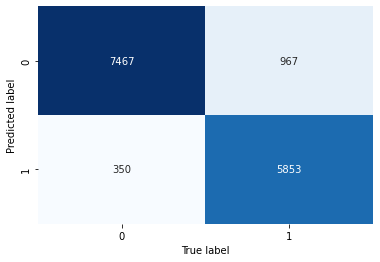

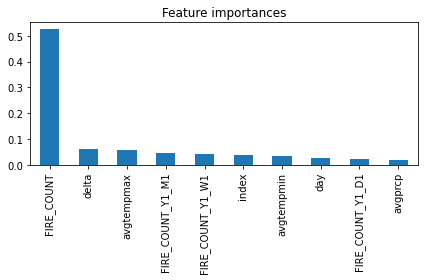

In [19]:
data = df # name of your final DataFrame, after your feature engineering
min_year_pred = "2015-01-01"
target_col = "FIRE"
ratio = 0.75

# split train and prediction datasets
data = data[data["DISCOVERY_DATE"] < min_year_pred].copy() # get train data (features and target values)
data[target_col] = data[target_col].astype("int")


data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data.reset_index()
train_model_for_feature_engineering(data, target_col, ratio=ratio)


In [16]:
data

,index,DISCOVERY_DATE,STATE,FIRE_COUNT,FIRE_COUNT_Y1_M1,FIRE_COUNT_Y1_W1,FIRE_COUNT_Y1_D1,avgtempmax,avgtempmin,avgprcp,...,PA,SC,SD,TN,TX,UT,VA,WA,WI,FIRE
0,0,2011-01-01,MN,0,143.612133,33.210275,4.734925,14.0,0.333333,0.006667,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01,MI,0,143.612133,33.210275,4.734925,54.0,20.500000,0.182500,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01,MO,1,143.612133,33.210275,4.734925,27.0,11.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3,2011-01-01,IL,0,143.612133,33.210275,4.734925,38.0,16.250000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01,IN,0,143.612133,33.210275,4.734925,55.5,21.500000,0.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58413,58435,2014-12-31,IA,0,0.000000,0.000000,0.000000,21.0,-5.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
58414,58436,2014-12-31,MD,0,2.000000,0.000000,0.000000,35.0,20.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
58415,58437,2014-12-31,NY,7,17.000000,4.000000,1.000000,27.5,21.000000,0.015000,...,0,0,0,0,0,0,0,0,0,0
58416,58438,2014-12-31,NJ,2,10.000000,3.000000,0.000000,32.0,19.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
